# Simple Linear Regression
Simple Linear Regression is a statistical model, widely used in ML regression tasks, based on the idea that the relationship between two variables can be explained by the following formula:
```
Y = Theata0 + Theta1 * X + E
```
E -> Error terms,</br>
Theta0 and Theta1 -> True Parameters of Regression,</br>
X -> Independent Variable.



# Gradient Descent
* It is an Iterative Algo.
> Simply means you have to perform it 'n' number of times to work.
</br>
* Used to find 'a' minimum of a 'differentiable function'
> May or may not find global minima.
> Differentiable fn is a smooth line(can be considered linear at each internal point) and does not have any break.

# Cost Function

A function to measure the deviatioin of the model's prediction from the ground truth/true values.

> Gradient Descent is used to minimize this Cost Function and to find optimal parameters.

### Learning Rate - Alpha
Can be defined as the distance that the model moves with each iteration. If set too big, the gradient descent might not find the minima. If set too small, it will take more iteration and longer time to reach a minima.

# Simultaneous Update
Let's look at your surface with three variables. x and y are your theta values, and z is J(theta).

What gradient descent does is look at the point on the surface where you are currently, and finds the quickest route down. This direction is a vector that is a combination of x and y.

When you don't do simultaneous updates, it's like you're taking one step forward (in x), then one step right (in y), then one step forward, then one step right... At each step you're not choosing the steepest descent.

When you update simultaneously, you're combining the two steps into one step that's forward and right at the same time. That's the direction you want to go.

In [488]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [489]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=7, bias=50, random_state=200)
m = 500

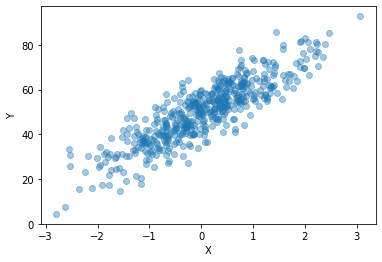

In [490]:
plt.scatter(X,y, alpha = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [491]:
import numpy as np
def hypothesis(X,w):
    return (w[1]*np.array(X[:,0])+w[0])

In [492]:
def cost(w,X,y):
    return (.5/m) * np.sum(np.square(hypothesis(X,w)-np.array(y)))

In [493]:
def grad(w,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(hypothesis(X,w)-np.array(y))
    g[1] = (1/m) * np.sum((hypothesis(X,w)-np.array(y))*np.array(X[:,0]))
    return g

In [494]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev,X,y))
    i=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev,X,y)[0]
        w1 = w_prev[1] - lr*grad(w_prev,X,y)[1]
        w_new = [w0, w1]
        print(w_new)
        print(cost(w_new,X,y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-6):
            return w_new
        if i>700: 
            return w_new
        i+=1

In [495]:
w = [0,0]

In [496]:
w = descent(w,w,.1)

[0, 0]
1361.3173988352899
[5.032371173546899, 1.3343709639081611]
1103.994064035831
[9.557715938958825, 2.523056087690324]
896.164692400124
[13.627150649596793, 3.581840846284423]
728.305892053671
[17.28663519655507, 4.5248111653932614]
592.7273907629833
[20.57749348119661, 5.364535418712168]
483.21906153073616
[23.5368813236068, 6.1122270259261295]
394.76593780001025
[26.198207118462886, 6.777889710982302]
323.31811792536735
[28.59151001281808, 7.3704472622614805]
265.60498354606096
[30.743799897619752, 7.897859441369547]
218.9851946621252
[32.679363070922875, 8.367225512930046]
181.32556945076556
[34.42003704078257, 8.784876711818411]
150.90328494111466
[35.98545758527278, 9.156458824800605]
126.32690674662499
[37.39328087199127, 9.487005938790986]
106.47262149680674
[38.659383156186806, 9.781006296374846]
90.43274425414705
[39.79804032205996, 10.042461099462315]
77.474137204832
[40.822089302945635, 10.274937012709582]
67.00463122899653
[41.74307321038032, 10.481613038549124]
58.5459

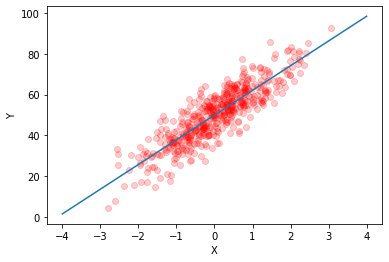

In [498]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = my_formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x

plt.scatter(X,y,color = 'red', alpha = 0.2)
graph(my_formula, range(-4,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# R^2 Method
SST: Sum of Squares Total -> Total Variation</br>
SSR: Sum of Squares Regression -> Explained Variation</br>
SSE: Sum of Squares Errors -> Unexplained Variation</br>

SST = SSR + SSE

R^2 = SSR/SST = 1-(SSR/SST)



In [499]:
def r2_test(y,y_calc):
    SSR = np.sum((y-y_calc)**2)
    SST = np.sum((y-y.mean())**2)
    return (1-(SSR/SST))*100
print(r2_test(y,hypothesis(X,w)))

75.87489828606884


In [500]:
df = pd.read_csv("/content/mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


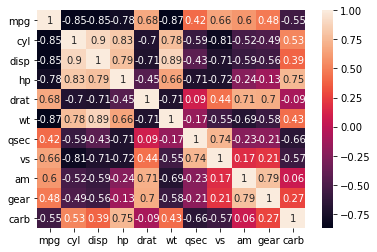

In [501]:
cor = df.corr().round(2)
sns.heatmap(data=cor,annot=True)
plt.show()

In [502]:
df.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [503]:
df = df.drop(['cyl','disp','hp','drat','qsec','vs','am','gear','carb','Unnamed: 0'], axis = 1)
df.head()

,mpg,wt
0,21.0,2.620
1,21.0,2.875
2,22.8,2.320
3,21.4,3.215
4,18.7,3.440


In [504]:
Xi = df['wt']
yi = df['mpg']
m = Xi.count()

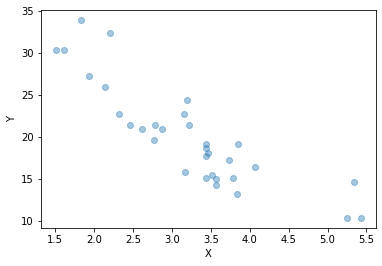

In [505]:
plt.scatter(Xi,yi, alpha = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [506]:
X = (Xi - min(Xi))/(max(Xi)-min(Xi))
y = (yi - min(yi))/(max(yi)-min(yi))

X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

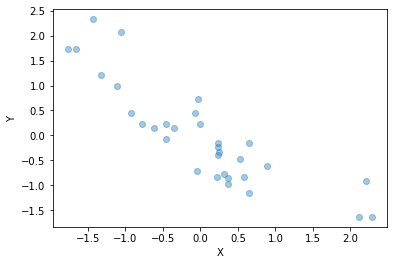

In [507]:
plt.scatter(X,y, alpha = 0.4)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [508]:
X = X.to_numpy()
y = y.to_numpy()

In [509]:
X = X.reshape((m,1))

In [ ]:
w = [0,0]
w = descent(w,w,.1)

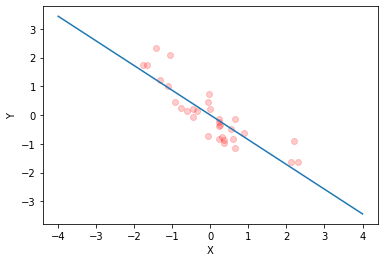

In [511]:
plt.scatter(X,y,color = 'red', alpha = 0.2)
graph(my_formula, range(-4,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [512]:
print(r2_test(y,hypothesis(X,w)))

75.27619926635202


# Multiple Linear Regression

In [513]:
df = pd.read_csv("/content/mtcars.csv")
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


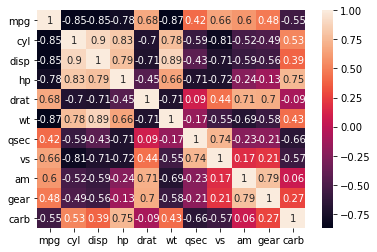

In [514]:
cor = df.corr().round(2)
sns.heatmap(data=cor,annot=True)
plt.show()

In [515]:
df.isna().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [516]:
df = df.drop(['cyl','disp','drat','qsec','vs','am','gear','carb','Unnamed: 0'], axis = 1)
df.head()

,mpg,hp,wt
0,21.0,110,2.620
1,21.0,110,2.875
2,22.8,93,2.320
3,21.4,110,3.215
4,18.7,175,3.440


In [517]:
Xi = df[['wt','hp']]
yi = df['mpg']
m = Xi.wt.count()

In [ ]:
for column in Xi:
  Xi[column] = (Xi[column] - min(Xi[column]))/(max(Xi[column])-min(Xi[column]))
X = Xi
y = (yi - min(yi))/(max(yi)-min(yi))
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

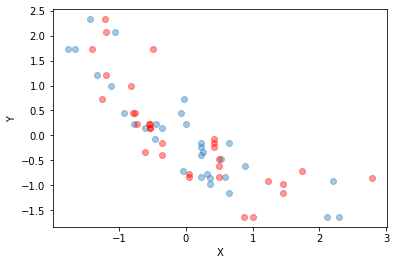

In [519]:
plt.scatter(X.wt,y, alpha = 0.4)
plt.scatter(X.hp,y, alpha = 0.4, color = 'red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [520]:
X = X.to_numpy()
y = y.to_numpy()

In [521]:
X = np.c_[X,np.ones(m)]

In [522]:
X[:5]

array([[-0.62016658, -0.54365487,  1.        ],
       [-0.35538219, -0.54365487,  1.        ],
       [-0.93167763, -0.7955699 ,  1.        ],
       [-0.00233633, -0.54365487,  1.        ],
       [ 0.23129695,  0.41954967,  1.        ]])

In [523]:
y[:5]

array([ 0.15329914,  0.15329914,  0.4567366 ,  0.22072968, -0.23442651])

In [524]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []  
    theta_list = [] 
    prediction_list = []
    run = True
    cost_list.append(1e10) 
    i=0
    while run:
        prediction = np.dot(x, theta) 
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error) 
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error)) 
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:
            run = False

        i+=1
    cost_list.pop(0)
    return prediction_list, cost_list, theta_list

In [525]:
theta = np.zeros(3)
alpha = 0.1
prediction_list, cost_list, theta_list = gradient_descent(X, y, m, theta, alpha)

In [526]:
theta = theta_list[-1]

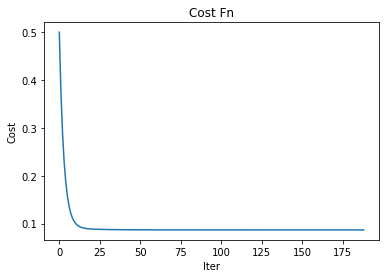

In [527]:
plt.title('Cost Fn')
plt.xlabel('Iter')
plt.ylabel('Cost')
plt.plot(cost_list)
plt.show()

In [528]:
print(r2_test(y,np.dot(X, theta)))

82.67854274076456


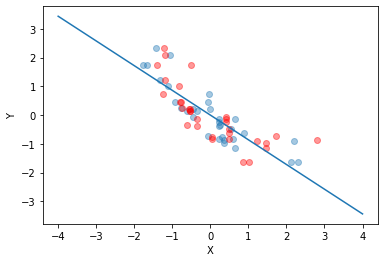

In [534]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = my_formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return w[0]+w[1]*x

plt.scatter(X[:,0],y, alpha = 0.4)
plt.scatter(X[:,1],y, alpha = 0.4, color = 'red')
graph(my_formula, range(-4,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()